Trương Duy Kha 19146015

link Github: https://github.com/TruongDuyKha/Khuon_mat.git

link dataset: https://drive.google.com/drive/folders/1yHWJ-KvivuFaypeyUv1vT5FQMZxgYSLb

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
import glob
from tensorflow.keras.optimizers import Adam, RMSprop

In [2]:
ca_nhan = list()
for img in glob.glob('/content/drive/MyDrive/Khuon_mat_dataset/ca_nhan/*.jpg'):
  ca_nhan.append(img_to_array(load_img(img,target_size=(150,150))))
nguoi_khac = list()
for img in glob.glob('/content/drive/MyDrive/Khuon_mat_dataset/nguoi_khac/*.jpg'):
  nguoi_khac.append(img_to_array(load_img(img,target_size=(150,150))))

In [21]:
input_dataset = np.array(ca_nhan + nguoi_khac)
label_dataset = np.array([1]*len(ca_nhan) + [0]*len(nguoi_khac))

In [22]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset,label_dataset
                                                    ,train_size=0.8, test_size=0.2, random_state= 0)

In [23]:
from skimage import color

x_train = color.rgb2gray(x_train)
print(x_train.shape)
x_test = color.rgb2gray(x_test)
print(x_test.shape)

(85, 150, 150)
(22, 150, 150)


In [24]:
x_train = x_train.reshape(85,22500)
x_test = x_test.reshape(22,22500)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# đưa giá trị về từ 0-1
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 2)
y_test = np_utils.to_categorical(y_test, 2)

In [26]:
Model = Sequential()
Model.add(Dense(512, activation='relu',input_shape = (22500,)))
Model.add(Dropout(0.1))
Model.add(Dense(512,activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(512,activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(2,activation='softmax'))
Model.summary()
Model.compile(loss='mean_squared_error',optimizer =RMSprop(), metrics=['accuracy'])
history = Model.fit(x_train, y_train, batch_size =64, epochs = 20, validation_split = 0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               11520512  
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 2)                

In [27]:
score = Model.evaluate(x_test,y_test,verbose = 1)

1/1 [==============================] - 0s 40ms/step - loss: 0.2727 - accuracy: 0.7273


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


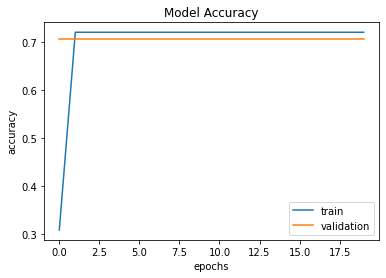

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

'yes'

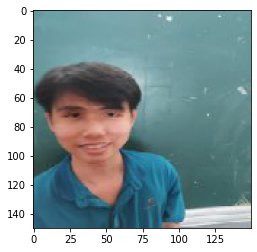

In [34]:
y_label = ['no','yes']
img = load_img('1.jpg',target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = color.rgb2gray(img)
img = img.reshape(1,22500)
y_label[np.argmax(Model.predict(img),axis = 1)[0]]